In [202]:
#!pip install -r requirements.txt

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Lectura de datos

In [204]:
X_t0_path = "X_t1.parquet"
y_t0_path = "y_t1.parquet"
X_t1_path = "X_t2.parquet"

In [205]:
x_t0 = pd.read_parquet(X_t0_path)
x_t0

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
44296,10336632,1.593110e+09,0x585bb700e2cdb34e8857bcf156df116636992825,1.551772e+09,1.593110e+09,41337993.0,12,14,-2,0.015177,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,0,0
44297,10336644,1.593110e+09,0x2d0b0664d55ddc851561678bbe97d538ae78ed72,1.565473e+09,1.593110e+09,27637657.0,189,217,-28,1.162723,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44298,10336670,1.593111e+09,0x25f810cd651e4de4814f519a0ad27c5e7a50338d,1.496321e+09,1.593106e+09,96789742.0,27,32,-5,0.270085,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44299,10336675,1.593111e+09,0xd09051f120a79abe6c706285810cb8c199e1ce65,1.563614e+09,1.593110e+09,29496551.0,171,228,-57,0.206756,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,0,1
44300,10336679,1.593111e+09,0xc68914cb0fbd2ae5888035abe36aa3bc8722ac7c,1.593109e+09,1.593111e+09,1339.0,4,3,1,0.010250,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88587,11325319,1.606277e+09,0x7513da56ad88ef8e20f511d9feafdb331a080e2b,1.594007e+09,1.606274e+09,12270253.0,866,1255,-389,32.987690,...,30.962771,-0.668490,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1
88588,11325368,1.606278e+09,0x5c5ec5909529da0ef4121a5396f606e15d833acc,1.598003e+09,1.606212e+09,8275345.0,44,46,-2,0.719065,...,30.962771,-0.668490,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1
88589,11325380,1.606278e+09,0x6aaaf98e8522491bc1006cd8cf95515220144dd3,1.598773e+09,1.606277e+09,7504873.0,364,554,-190,13.992309,...,30.962771,-0.668490,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1
88590,11325390,1.606278e+09,0x05c0f2d1978a1da91e5d82b8935c610b3f93f36b,1.592317e+09,1.606278e+09,13961267.0,269,424,-155,5.728127,...,30.962771,-0.668490,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1


# EDA

## Tiempo

Las unidades de tiempo están en unix y se pasarán a dias. Por otro lado existen unidades de tiempo con valor 999999999, esto no debería pasar por lo que se reemplazaran

In [206]:
valor_maximo = x_t0['borrow_timestamp'].max()
valor_minimo = x_t0['borrow_timestamp'].min()

print("El valor máximo es:", valor_maximo)
print("El valor mínimo es:", valor_minimo)

El valor máximo es: 1606278950.0
El valor mínimo es: 1593110291.0


In [207]:
# Encontrar el valor máximo y mínimo en la columna 'variable'
valor_maximo = x_t0['first_tx_timestamp'].max()
valor_minimo = x_t0['first_tx_timestamp'].min()

print("El valor máximo es:", valor_maximo)
print("El valor mínimo es:", valor_minimo)

El valor máximo es: 1606228446.0
El valor mínimo es: 1438269973.0


In [208]:
# Encontrar el valor máximo y mínimo en la columna 'variable'
valor_maximo = x_t0['wallet_age'].max()
valor_minimo = x_t0['wallet_age'].min()

print("El valor máximo es:", valor_maximo)
print("El valor mínimo es:", valor_minimo)

El valor máximo es: 162156885.0
El valor mínimo es: 144.0


In [209]:
# Encontrar el valor máximo y mínimo en la columna 'variable'
valor_maximo = x_t0['risky_first_tx_timestamp'].max()
valor_minimo = x_t0['risky_first_tx_timestamp'].min()

print("El valor máximo es:", valor_maximo)
print("El valor mínimo es:", valor_minimo)

El valor máximo es: 1606272559
El valor mínimo es: 999999999


In [210]:
# Reemplazar valores de 'risky_first_tx_timestamp' con 'first_tx_timestamp' si es igual a 999999999
x_t0['risky_first_tx_timestamp'] = x_t0.apply(
    lambda row: row['first_tx_timestamp'] if row['risky_first_tx_timestamp'] == 999999999 else row['risky_first_tx_timestamp'],
    axis=1
)

# Encontrar el valor máximo y mínimo en la columna 'variable'
valor_maximo = x_t0['risky_first_tx_timestamp'].max()
valor_minimo = x_t0['risky_first_tx_timestamp'].min()

print("El valor máximo es:", valor_maximo)
print("El valor mínimo es:", valor_minimo)

El valor máximo es: 1606272559.0
El valor mínimo es: 1438269973.0


In [211]:
x_t0['risky_last_tx_timestamp'] = x_t0.apply(
    lambda row: row['last_tx_timestamp'] if row['risky_last_tx_timestamp'] == 999999999 else row['risky_last_tx_timestamp'],
    axis=1)
    
# Encontrar el valor máximo y mínimo en la columna 'variable'
valor_maximo = x_t0['risky_last_tx_timestamp'].max()
valor_minimo = x_t0['risky_last_tx_timestamp'].min()

print("El valor máximo es:", valor_maximo)
print("El valor mínimo es:", valor_minimo)

El valor máximo es: 1606278739.0
El valor mínimo es: 1584021193.0


In [212]:
valor_maximo = x_t0['time_since_last_liquidated'].max()
valor_minimo = x_t0['time_since_last_liquidated'].min()

print("El valor máximo es:", valor_maximo)
print("El valor mínimo es:", valor_minimo)

El valor máximo es: 999999999.0
El valor mínimo es: 60.0


In [213]:
x_t0.loc[x_t0['time_since_last_liquidated'] == 999999999, 'time_since_last_liquidated'] = 0
x_t0['time_since_last_liquidated'] = x_t0['time_since_last_liquidated'] /86400

valor_maximo = x_t0['time_since_last_liquidated'].max()
valor_minimo = x_t0['time_since_last_liquidated'].min()

print("El valor máximo es:", valor_maximo)
print("El valor mínimo es:", valor_minimo)


El valor máximo es: 494.9913888888889
El valor mínimo es: 0.0


In [214]:

x_t0['time_since_first_deposit'] = x_t0['time_since_first_deposit']/86400


## Creacion de variables

In [215]:
x_t0['diff_eth'] = x_t0['incoming_tx_sum_eth'] - x_t0['outgoing_tx_sum_eth']


In [216]:
x_t0['days_dif_tx_timestamp'] = (x_t0['last_tx_timestamp'] - x_t0['first_tx_timestamp'])/86400

x_t0['wallet_age'] = x_t0['wallet_age'] /86400

#x_t0 = pd.get_dummies(x_t0, columns=['unique_borrow_protocol_count'], drop_first=True)

#x_t0['diff_tx_sum_eth'] = (x_t0['outgoing_tx_sum_eth'] - x_t0['incoming_tx_sum_eth']).clip(lower=0)

#x_t0['withdraw_deposit_diff_if_positive_eth'] = (x_t0['withdraw_amount_sum_eth']- x_t0['deposit_amount_sum_eth'])
#x_t0['time_since_first_tx'] = (x_t0['borrow_timestamp'] - x_t0['first_tx_timestamp'])/86400


x_t0 = x_t0.drop(columns=['time_since_last_liquidated'])
#x_t0 = x_t0.drop(columns=['withdraw_amount_sum_eth','deposit_amount_sum_eth'])

#x_t0 = x_t0.drop(columns=['outgoing_tx_avg_eth','incoming_tx_avg_eth'])


# Tratamiento de y_t0

Y tiene 132888 filas mientras que X tiene un tercio. Por lo que se analizarán los datos y se procesarán para que queden en la misma dimensión.

In [217]:
y_t0 = pd.read_parquet(y_t0_path)
y_t0

,target
0,0
1,0
2,0
3,0
4,1
...,...
88587,1
88588,0
88589,1
88590,1


In [218]:
print(y_t0.index)

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       88582, 88583, 88584, 88585, 88586, 88587, 88588, 88589, 88590, 88591],
      dtype='int64', length=132888)


In [219]:
import pandas as pd


duplicated_indices = y_t0.index[y_t0.index.duplicated()]

duplicated_rows = y_t0[y_t0.index.duplicated(keep=False)]

grouped_classes = duplicated_rows.groupby(duplicated_rows.index)['target'].apply(list)

new_df = grouped_classes.reset_index()
new_df.columns = ['index', 'target_classes']

target_columns = pd.DataFrame(new_df['target_classes'].tolist(), index=new_df['index'])
target_columns.columns = [f'target {i + 1}' for i in range(target_columns.shape[1])]

final_df = pd.concat([new_df[['index']], target_columns], axis=1)

print("\nNuevo DataFrame con índices duplicados y clases:")
print(final_df)



Nuevo DataFrame con índices duplicados y clases:
       index  target 1  target 2
0          0         0         0
1          1         0         1
2          2         0         0
3          3         0         0
4          4         1         0
...      ...       ...       ...
44291  44291         1         0
44292  44292         0         0
44293  44293         1         1
44294  44294         1         0
44295  44295         0         0

[44296 rows x 3 columns]


In [220]:
y_t0_final = y_t0.tail(44296).reset_index(drop=True)

In [221]:
y_t0_final

,target
0,1
1,0
2,0
3,0
4,1
...,...
44291,1
44292,0
44293,1
44294,1


In [222]:

y_t0_final = y_t0_final.reset_index(drop=True)
final_df = final_df.reset_index(drop=True)

final_df['y_t0_final'] = y_t0_final

print("\nFinal DataFrame con la nueva columna:")
print(final_df)



Final DataFrame con la nueva columna:
       index  target 1  target 2  y_t0_final
0          0         0         0           1
1          1         0         1           0
2          2         0         0           0
3          3         0         0           0
4          4         1         0           1
...      ...       ...       ...         ...
44291  44291         1         0           1
44292  44292         0         0           0
44293  44293         1         1           1
44294  44294         1         0           1
44295  44295         0         0           0

[44296 rows x 4 columns]


In [223]:
final_df = final_df.drop(columns=['index'])

In [224]:
final_df['target'] = final_df.sum(axis=1)

print("\nFinal DataFrame con la columna de suma:")
print(final_df)


Final DataFrame con la columna de suma:
       target 1  target 2  y_t0_final  target
0             0         0           1       1
1             0         1           0       1
2             0         0           0       0
3             0         0           0       0
4             1         0           1       2
...         ...       ...         ...     ...
44291         1         0           1       2
44292         0         0           0       0
44293         1         1           1       3
44294         1         0           1       2
44295         0         0           0       0

[44296 rows x 4 columns]


In [225]:
final_df = final_df.drop(columns=['target 1','target 2','y_t0_final'])
final_df

,target
0,1
1,1
2,0
3,0
4,2
...,...
44291,2
44292,0
44293,3
44294,2


In [226]:
final_df['target'] = np.where(final_df['target'] == 0, 0, 1)


In [227]:
y_t0 = final_df

In [228]:
conteo = y_t0['target'].value_counts()
print(conteo)

target
1    33640
0    10656
Name: count, dtype: int64


In [229]:
y_t0

,target
0,1
1,1
2,0
3,0
4,1
...,...
44291,1
44292,0
44293,1
44294,1


# Modelos


## Baseline

In [230]:
x_t0

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,diff_eth,days_dif_tx_timestamp
44296,10336632,1.593110e+09,0x585bb700e2cdb34e8857bcf156df116636992825,1.551772e+09,1.593110e+09,478.448993,12,14,-2,0.015177,...,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,0,0,137.408652,478.448634
44297,10336644,1.593110e+09,0x2d0b0664d55ddc851561678bbe97d538ae78ed72,1.565473e+09,1.593110e+09,319.880289,189,217,-28,1.162723,...,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1,3.174964,319.878958
44298,10336670,1.593111e+09,0x25f810cd651e4de4814f519a0ad27c5e7a50338d,1.496321e+09,1.593106e+09,1120.251644,27,32,-5,0.270085,...,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1,-10.136386,1120.199317
44299,10336675,1.593111e+09,0xd09051f120a79abe6c706285810cb8c199e1ce65,1.563614e+09,1.593110e+09,341.395266,171,228,-57,0.206756,...,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,0,1,48.039291,341.388912
44300,10336679,1.593111e+09,0xc68914cb0fbd2ae5888035abe36aa3bc8722ac7c,1.593109e+09,1.593111e+09,0.015498,4,3,1,0.010250,...,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,0,1,0.041299,0.015255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88587,11325319,1.606277e+09,0x7513da56ad88ef8e20f511d9feafdb331a080e2b,1.594007e+09,1.606274e+09,142.016817,866,1255,-389,32.987690,...,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1,54.493819,141.977859
88588,11325368,1.606278e+09,0x5c5ec5909529da0ef4121a5396f606e15d833acc,1.598003e+09,1.606212e+09,95.779456,44,46,-2,0.719065,...,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1,14.721701,95.010023
88589,11325380,1.606278e+09,0x6aaaf98e8522491bc1006cd8cf95515220144dd3,1.598773e+09,1.606277e+09,86.861956,364,554,-190,13.992309,...,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1,55.217926,86.852025
88590,11325390,1.606278e+09,0x05c0f2d1978a1da91e5d82b8935c610b3f93f36b,1.592317e+09,1.606278e+09,161.588738,269,424,-155,5.728127,...,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1,-27.444978,161.587060


In [231]:

x_t0 = x_t0.drop(columns=['wallet_address','borrow_timestamp'
                          ,'last_tx_timestamp'
                          ,'risky_first_tx_timestamp'
                          ,'risky_last_tx_timestamp'
                          ,'first_tx_timestamp'])

In [232]:
x_t0 = x_t0.reset_index(drop=True)

x_t0

,borrow_block_number,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_last_tx_timestamp_diff,...,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,diff_eth,days_dif_tx_timestamp
0,10336632,478.448993,12,14,-2,0.015177,0.001084,1,2,0,...,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,0,0,137.408652,478.448634
1,10336644,319.880289,189,217,-28,1.162723,0.005358,13,3,521720,...,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1,3.174964,319.878958
2,10336670,1120.251644,27,32,-5,0.270085,0.008440,3,1,18937,...,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1,-10.136386,1120.199317
3,10336675,341.395266,171,228,-57,0.206756,0.000911,0,0,0,...,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,0,1,48.039291,341.388912
4,10336679,0.015498,4,3,1,0.010250,0.003417,0,0,0,...,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,0,1,0.041299,0.015255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,11325319,142.016817,866,1255,-389,32.987690,0.026285,152,13,11247584,...,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1,54.493819,141.977859
44292,11325368,95.779456,44,46,-2,0.719065,0.015632,18,4,8052966,...,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1,14.721701,95.010023
44293,11325380,86.861956,364,554,-190,13.992309,0.025348,44,20,7472600,...,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1,55.217926,86.852025
44294,11325390,161.588738,269,424,-155,5.728127,0.013510,47,23,8296290,...,3.420844,43.910955,177.439524,10.035855,0.312394,1.312394,1,1,-27.444978,161.587060


In [233]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import xgboost as xgb


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_t0, y_t0, test_size=0.3, random_state=1451)

# Inicializar el modelo de XGBoost y entrenarlo
model = xgb.XGBClassifier(objective='binary:logistic',eval_metric='aucpr', random_state=100)
model.fit(X_train, y_train)

# Usar el modelo para hacer predicciones y calcular probabilidades
y_proba_xgb = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Ajustar el umbral de decisión
new_threshold = 0.98 # Ajusta este valor según sea necesario
y_pred_adjusted = (y_proba_xgb > new_threshold).astype(int)

# Imprimir el informe de clasificación con el umbral ajustado
print("Informe de clasificación con umbral ajustado:\n", classification_report(y_test, y_pred_adjusted))

# Mostrar la matriz de confusión
from sklearn.metrics import confusion_matrix
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_adjusted))


Informe de clasificación con umbral ajustado:
               precision    recall  f1-score   support

           0       0.28      0.99      0.44      3187
           1       0.99      0.21      0.35     10102

    accuracy                           0.40     13289
   macro avg       0.64      0.60      0.40     13289
weighted avg       0.82      0.40      0.37     13289

Matriz de confusión:
 [[3165   22]
 [7945 2157]]


In [234]:
from sklearn.metrics import precision_recall_curve, auc

# y_true: valores reales
# y_scores: probabilidades predichas por el modelo
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_adjusted)
auc_pr = auc(recall, precision)

print("AUC-PR:", auc_pr)


AUC-PR: 0.9006442972379585


0.9006442972379585

## ELIMINACION DE VARIABLES

### Outliers

In [235]:
from scipy.stats.mstats import winsorize
num_columns = x_t0.select_dtypes(include=['float64', 'int64']).columns

# Función para identificar outliers usando IQR
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.1)
    Q3 = series.quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Identificar variables con outliers
outlier_vars = {}
for col in num_columns:
    outliers = detect_outliers_iqr(x_t0[col])
    if not outliers.empty:
        outlier_vars[col] = len(outliers)


# Aplicar winsorización a las variables con outliers
for col in outlier_vars.keys():
    x_t0[col] = winsorize(x_t0[col], limits=[0.01, 0.01])  # Limita al 1% inferior y superior



### Poca varianza

In [236]:
for col in x_t0.columns:
    if pd.api.types.is_numeric_dtype(x_t0[col]):
        variance = x_t0[col].var()
        print(f"Variance of column {col}: {variance}")
    else:
        print(f"Column {col} is not numeric, cannot calculate variance.")

Variance of column borrow_block_number: 101178033617.65482
Variance of column wallet_age: 164241.64247279323
Variance of column incoming_tx_count: 5790258.371916365
Variance of column outgoing_tx_count: 9832579.22809003
Variance of column net_incoming_tx_count: 349532.4130895681
Variance of column total_gas_paid_eth: 436.9796640593428
Variance of column avg_gas_paid_per_tx_eth: 0.00019361048871815501
Variance of column risky_tx_count: 13909.611392419287
Variance of column risky_unique_contract_count: 141.4905508312427
Variance of column risky_first_last_tx_timestamp_diff: 12603663912450.238
Variance of column risky_sum_outgoing_amount_eth: 19728429155.334106
Variance of column outgoing_tx_sum_eth: 142887197667.0877
Variance of column incoming_tx_sum_eth: 165603895808.92453
Variance of column outgoing_tx_avg_eth: 44875.79717051688
Variance of column incoming_tx_avg_eth: 57074.34465053302
Variance of column max_eth_ever: 1228734962.7504096
Variance of column min_eth_ever: 7697.0729228193

In [237]:
variances = {}
for col in x_t0.columns:
    if pd.api.types.is_numeric_dtype(x_t0[col]):
        variances[col] = x_t0[col].var()

# Set a threshold for variance
variance_threshold = 0.05

# Identify columns with variance below the threshold
columns_to_drop = [col for col, var in variances.items() if var < variance_threshold]

# Drop the columns from the DataFrame
x_t0_reduced = x_t0.drop(columns=columns_to_drop)

# Print the names of the dropped columns
print(f"Columns dropped: {columns_to_drop}")

# Display the reduced DataFrame
x_t0_reduced

Columns dropped: ['avg_gas_paid_per_tx_eth', 'market_correl', 'market_max_drawdown_365d', 'market_rocp', 'market_rocr', 'unique_lending_protocol_count']


,borrow_block_number,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,risky_tx_count,risky_unique_contract_count,risky_first_last_tx_timestamp_diff,risky_sum_outgoing_amount_eth,...,market_macdsignal_macdext,market_macdsignal_macdfix,market_macdsignal,market_natr,market_plus_di,market_plus_dm,market_ppo,unique_borrow_protocol_count,diff_eth,days_dif_tx_timestamp
0,10336632,478.448993,12,14,-2,0.015177,1,2,0,17.560335,...,1.459793,3.971377,4.145440,4.385686,19.552328,24.502158,-1.672639,0,137.408652,478.448634
1,10336644,319.880289,189,217,-28,1.162723,13,3,521720,113.787495,...,1.459793,3.971377,4.145440,4.385686,19.552328,24.502158,-1.672639,1,3.174964,319.878958
2,10336670,1120.251644,27,32,-5,0.270085,3,1,18937,170.000000,...,1.459793,3.971377,4.145440,4.385686,19.552328,24.502158,-1.672639,1,-10.136386,1120.199317
3,10336675,341.395266,171,228,-57,0.206756,0,0,0,0.000000,...,1.459793,3.971377,4.145440,4.385686,19.552328,24.502158,-1.672639,0,48.039291,341.388912
4,10336679,0.015498,4,3,1,0.013445,0,0,0,0.000000,...,1.459793,3.971377,4.145440,4.385686,19.552328,24.502158,-1.672639,0,0.041299,0.015255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,11325319,142.016817,866,1255,-389,32.987690,152,13,11247584,420.706341,...,36.008773,29.411432,30.962771,3.420844,43.910955,177.439524,10.035855,1,54.493819,141.977859
44292,11325368,95.779456,44,46,-2,0.719065,18,4,8052966,1946.426492,...,36.008773,29.411432,30.962771,3.420844,43.910955,177.439524,10.035855,1,14.721701,95.010023
44293,11325380,86.861956,364,554,-190,13.992309,44,20,7472600,109.506560,...,36.008773,29.411432,30.962771,3.420844,43.910955,177.439524,10.035855,1,55.217926,86.852025
44294,11325390,161.588738,269,424,-155,5.728127,47,23,8296290,51.469443,...,36.008773,29.411432,30.962771,3.420844,43.910955,177.439524,10.035855,1,-27.444978,161.587060


### Eliminación de variables altamente correlacionadas

In [238]:

correlation_matrix = x_t0_reduced.corr()

correlation_threshold = 0.95

highly_correlated_vars = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            highly_correlated_vars.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i,j]))

# Print the highly correlated variable pairs
print("Highly correlated variables:")
for var1, var2, correlation in highly_correlated_vars:
    print(f"{var1} and {var2}: {correlation}")

Highly correlated variables:
wallet_age and days_dif_tx_timestamp: 0.999962603468295
outgoing_tx_sum_eth and incoming_tx_sum_eth: 0.9970765967297625
outgoing_tx_avg_eth and incoming_tx_avg_eth: 0.9883561956607034
total_collateral_avg_eth and avg_weighted_risk_factor: 0.9734101288795738
borrow_amount_sum_eth and repay_amount_sum_eth: 0.9646960107737733
borrow_amount_sum_eth and deposit_amount_sum_eth: 0.9644191979778411
repay_amount_sum_eth and withdraw_amount_sum_eth: 0.9623917583200782
deposit_amount_sum_eth and withdraw_amount_sum_eth: 0.9595890189039786
market_apo and market_macd_macdext: 1.0
market_apo and market_ppo: 0.9823233326580956
market_cmo and market_plus_di: 0.959287458307345
market_macd_macdext and market_ppo: 0.9823233326580956
market_macd_macdfix and market_macd: 0.9999886085057568
market_macdsignal_macdfix and market_macdsignal: 0.9999915044742396


In [239]:
columns_to_drop_corr = set()
for var1, var2, correlation in highly_correlated_vars:
    # Prioritize dropping columns based on a criteria (e.g., lower variance, less informative)
    # Here, we'll drop the second variable in the pair
    columns_to_drop_corr.add(var2)

# Drop the highly correlated columns
x_t0_reduced = x_t0_reduced.drop(columns=list(columns_to_drop_corr))

# Display the updated DataFrame
print("Shape after dropping highly correlated columns:", x_t0_reduced.shape)
x_t0_reduced

Shape after dropping highly correlated columns: (44296, 54)


,borrow_block_number,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,risky_tx_count,risky_unique_contract_count,risky_first_last_tx_timestamp_diff,risky_sum_outgoing_amount_eth,...,market_fastd,market_ht_trendmode,market_linearreg_slope,market_macd_macdfix,market_macdsignal_macdext,market_macdsignal_macdfix,market_natr,market_plus_dm,unique_borrow_protocol_count,diff_eth
0,10336632,478.448993,12,14,-2,0.015177,1,2,0,17.560335,...,76.847924,0,0.212652,3.134919,1.459793,3.971377,4.385686,24.502158,0,137.408652
1,10336644,319.880289,189,217,-28,1.162723,13,3,521720,113.787495,...,76.847924,0,0.212652,3.134919,1.459793,3.971377,4.385686,24.502158,1,3.174964
2,10336670,1120.251644,27,32,-5,0.270085,3,1,18937,170.000000,...,76.847924,0,0.212652,3.134919,1.459793,3.971377,4.385686,24.502158,1,-10.136386
3,10336675,341.395266,171,228,-57,0.206756,0,0,0,0.000000,...,76.847924,0,0.212652,3.134919,1.459793,3.971377,4.385686,24.502158,0,48.039291
4,10336679,0.015498,4,3,1,0.013445,0,0,0,0.000000,...,76.847924,0,0.212652,3.134919,1.459793,3.971377,4.385686,24.502158,0,0.041299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,11325319,142.016817,866,1255,-389,32.987690,152,13,11247584,420.706341,...,89.547382,1,11.374890,42.163546,36.008773,29.411432,3.420844,177.439524,1,54.493819
44292,11325368,95.779456,44,46,-2,0.719065,18,4,8052966,1946.426492,...,89.547382,1,11.374890,42.163546,36.008773,29.411432,3.420844,177.439524,1,14.721701
44293,11325380,86.861956,364,554,-190,13.992309,44,20,7472600,109.506560,...,89.547382,1,11.374890,42.163546,36.008773,29.411432,3.420844,177.439524,1,55.217926
44294,11325390,161.588738,269,424,-155,5.728127,47,23,8296290,51.469443,...,89.547382,1,11.374890,42.163546,36.008773,29.411432,3.420844,177.439524,1,-27.444978


# Modelo XGBoost 

scale_pos_weight calculado: 0.32


C:\Users\Junwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Umbral óptimo: 0.71
Suma de recalls en el umbral óptimo: 1.31


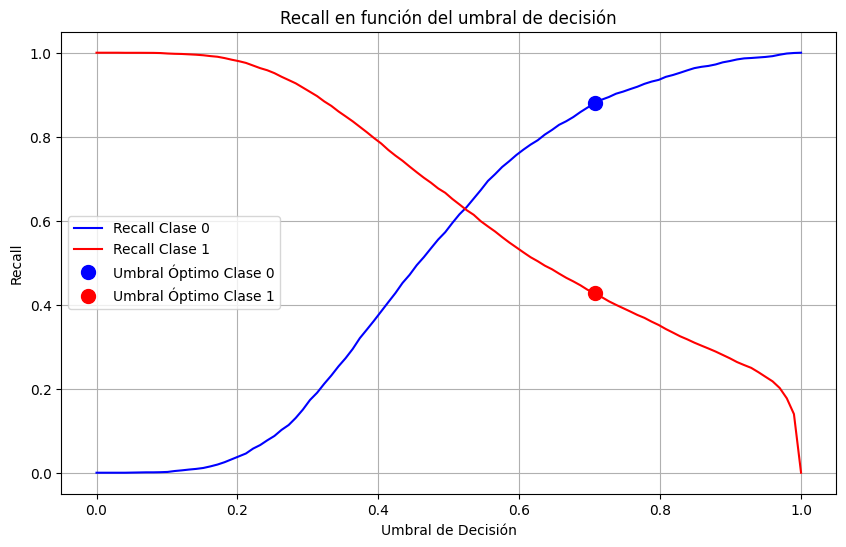

Informe de clasificación con umbral óptimo:
               precision    recall  f1-score   support

           0       0.33      0.88      0.48      3187
           1       0.92      0.43      0.58     10102

    accuracy                           0.54     13289
   macro avg       0.62      0.65      0.53     13289
weighted avg       0.78      0.54      0.56     13289

Matriz de confusión:
 [[2802  385]
 [5780 4322]]
AUC-PR: 0.8904968831650977


In [240]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_recall_curve, auc
from xgboost import XGBClassifier

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_t0_reduced, y_t0, test_size=0.3, random_state=1451)

# Calcular scale_pos_weight
class_0_count = np.sum(y_train == 0).item()  # Convertir a número escalar
class_1_count = np.sum(y_train == 1).item()  # Convertir a número escalar
scale_pos_weight = class_0_count / class_1_count

print(f"scale_pos_weight calculado: {scale_pos_weight:.2f}")
# Inicializar y entrenar el modelo de XGBoost
model = XGBClassifier(objective='binary:logistic', 
                      eval_metric='logloss', 
                      random_state=100, 
                      scale_pos_weight=scale_pos_weight)

model.fit(X_train, y_train)

# Hacer predicciones de probabilidad
y_proba_xgb = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Definir una lista de umbrales de 0 a 1 con pasos pequeños
thresholds = np.linspace(0, 1, 100)
recall_class_0 = []
recall_class_1 = []
sum_recall = []

# Calcular el recall para cada umbral y la suma de recalls
for threshold in thresholds:
    y_pred_adjusted = (y_proba_xgb > threshold).astype(int)
    recall_0 = recall_score(y_test, y_pred_adjusted, pos_label=0)
    recall_1 = recall_score(y_test, y_pred_adjusted, pos_label=1)
    recall_class_0.append(recall_0)
    recall_class_1.append(recall_1)
    sum_recall.append(recall_0 + recall_1)

# Encontrar el umbral donde la suma de recalls es máxima
optimal_threshold_index = np.argmax(sum_recall)
optimal_threshold = thresholds[optimal_threshold_index]

# Imprimir el umbral óptimo y la suma de recalls
print(f"Umbral óptimo: {optimal_threshold:.2f}")
print(f"Suma de recalls en el umbral óptimo: {sum_recall[optimal_threshold_index]:.2f}")

# Graficar los recalls de ambas clases en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recall_class_0, label='Recall Clase 0', color='blue')
plt.plot(thresholds, recall_class_1, label='Recall Clase 1', color='red')
plt.plot(optimal_threshold, recall_class_0[optimal_threshold_index], 'bo', markersize=10, label='Umbral Óptimo Clase 0')
plt.plot(optimal_threshold, recall_class_1[optimal_threshold_index], 'ro', markersize=10, label='Umbral Óptimo Clase 1')
plt.xlabel('Umbral de Decisión')
plt.ylabel('Recall')
plt.title('Recall en función del umbral de decisión')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir el informe de clasificación con el umbral óptimo
y_pred_adjusted = (y_proba_xgb > optimal_threshold).astype(int)
print("Informe de clasificación con umbral óptimo:\n", classification_report(y_test, y_pred_adjusted))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_adjusted))

# Calcular la curva Precision-Recall y el AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_proba_xgb)
auc_pr = auc(recall, precision)

print("AUC-PR:", auc_pr)


scale_pos_weight calculado: 0.32


C:\Users\Junwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Umbral óptimo: 0.70
Suma de F1-scores en el umbral óptimo: 1.19


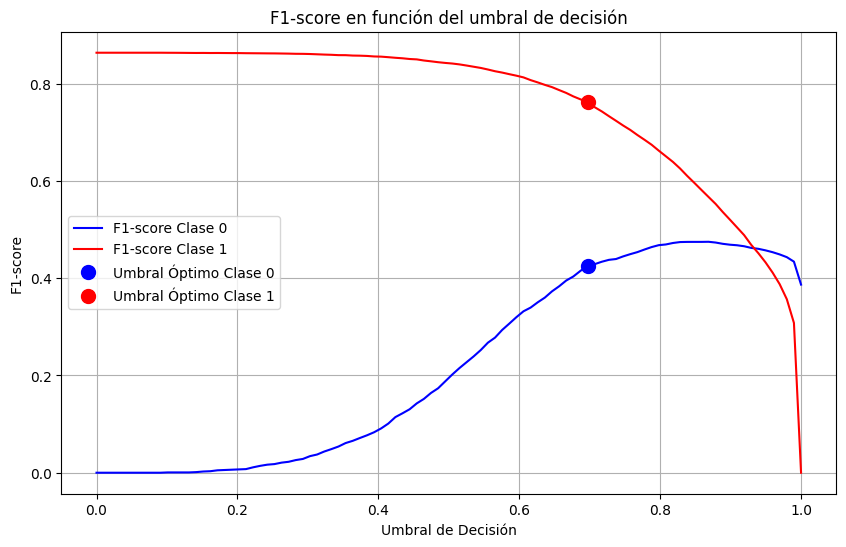

Informe de clasificación con umbral óptimo:
               precision    recall  f1-score   support

           0       0.36      0.52      0.43      3187
           1       0.82      0.71      0.76     10102

    accuracy                           0.66     13289
   macro avg       0.59      0.61      0.59     13289
weighted avg       0.71      0.66      0.68     13289

Matriz de confusión:
 [[1656 1531]
 [2939 7163]]
AUC-PR: 0.8770647054338575


In [241]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from xgboost import XGBClassifier

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_t0_reduced, y_t0, test_size=0.3, random_state=1451)

# Calcular scale_pos_weight
class_0_count = np.sum(y_train == 0).item()  # Convertir a número escalar
class_1_count = np.sum(y_train == 1).item()  # Convertir a número escalar
scale_pos_weight = class_0_count / class_1_count

print(f"scale_pos_weight calculado: {scale_pos_weight:.2f}")
# Inicializar y entrenar el modelo de XGBoost
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=100)
model.fit(X_train, y_train)

# Hacer predicciones de probabilidad
y_proba_xgb = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Definir una lista de umbrales de 0 a 1 con pasos pequeños
thresholds = np.linspace(0, 1, 100)
f1_class_0 = []
f1_class_1 = []
sum_f1 = []

# Calcular el F1-score para cada umbral y la suma de F1-scores
for threshold in thresholds:
    y_pred_adjusted = (y_proba_xgb > threshold).astype(int)
    f1_0 = f1_score(y_test, y_pred_adjusted, pos_label=0)
    f1_1 = f1_score(y_test, y_pred_adjusted, pos_label=1)
    f1_class_0.append(f1_0)
    f1_class_1.append(f1_1)
    sum_f1.append(f1_0 + f1_1)

# Encontrar el umbral donde la suma de F1-scores es máxima
optimal_threshold_index = np.argmax(sum_f1)
optimal_threshold = thresholds[optimal_threshold_index]

# Imprimir el umbral óptimo y la suma de F1-scores
print(f"Umbral óptimo: {optimal_threshold:.2f}")
print(f"Suma de F1-scores en el umbral óptimo: {sum_f1[optimal_threshold_index]:.2f}")

# Graficar los F1-scores de ambas clases en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_class_0, label='F1-score Clase 0', color='blue')
plt.plot(thresholds, f1_class_1, label='F1-score Clase 1', color='red')
plt.plot(optimal_threshold, f1_class_0[optimal_threshold_index], 'bo', markersize=10, label='Umbral Óptimo Clase 0')
plt.plot(optimal_threshold, f1_class_1[optimal_threshold_index], 'ro', markersize=10, label='Umbral Óptimo Clase 1')
plt.xlabel('Umbral de Decisión')
plt.ylabel('F1-score')
plt.title('F1-score en función del umbral de decisión')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir el informe de clasificación con el umbral óptimo
y_pred_adjusted = (y_proba_xgb > optimal_threshold).astype(int)
print("Informe de clasificación con umbral óptimo:\n", classification_report(y_test, y_pred_adjusted))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_adjusted))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_adjusted)
auc_pr = auc(recall, precision)

print("AUC-PR:", auc_pr)



In [242]:
from sklearn.metrics import f1_score

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_t0_reduced, y_t0, test_size=0.3, random_state=1451)

# Calcular scale_pos_weight
class_0_count = np.sum(y_train == 0).item()  # Convertir a número escalar
class_1_count = np.sum(y_train == 1).item()  # Convertir a número escalar
scale_pos_weight = class_0_count / class_1_count

print(f"scale_pos_weight calculado: {scale_pos_weight:.2f}")
# Inicializar el modelo de XGBoost
model = XGBClassifier(objective='binary:logistic', 
                      eval_metric='logloss', 
                      random_state=100, 
                      scale_pos_weight=scale_pos_weight)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones de probabilidad
y_proba_xgb = model.predict_proba(X_test)[:, 1]

# Encontrar el umbral que maximiza el menor F1-score entre las dos clases
thresholds = np.linspace(0, 1, 100)
f1_class_0 = []
f1_class_1 = []
min_f1_scores = []

for threshold in thresholds:
    y_pred_adjusted = (y_proba_xgb > threshold).astype(int)
    f1_0 = f1_score(y_test, y_pred_adjusted, pos_label=0)
    f1_1 = f1_score(y_test, y_pred_adjusted, pos_label=1)
    f1_class_0.append(f1_0)
    f1_class_1.append(f1_1)
    min_f1_scores.append(min(f1_0, f1_1))

# Umbral óptimo basado en el F1-score mínimo
optimal_threshold_index = np.argmax(min_f1_scores)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Umbral óptimo: {optimal_threshold:.2f}")
print(f"F1-Score Clase 0: {f1_class_0[optimal_threshold_index]:.2f}")
print(f"F1-Score Clase 1: {f1_class_1[optimal_threshold_index]:.2f}")

# Ajustar predicciones usando el umbral óptimo
y_pred_adjusted = (y_proba_xgb > optimal_threshold).astype(int)

# Informe de clasificación final
print("\nInforme de clasificación con umbral óptimo:")
print(classification_report(y_test, y_pred_adjusted))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_adjusted)
auc_pr = auc(recall, precision)

print("AUC-PR:", auc_pr)



scale_pos_weight calculado: 0.32


C:\Users\Junwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Umbral óptimo: 0.71
F1-Score Clase 0: 0.48
F1-Score Clase 1: 0.58

Informe de clasificación con umbral óptimo:
              precision    recall  f1-score   support

           0       0.33      0.88      0.48      3187
           1       0.92      0.43      0.58     10102

    accuracy                           0.54     13289
   macro avg       0.62      0.65      0.53     13289
weighted avg       0.78      0.54      0.56     13289

AUC-PR: 0.8904945970110432


In [243]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(x_t0_reduced, y_t0, test_size=0.3, random_state=1451)

# Calcular scale_pos_weight
class_0_count = np.sum(y_train == 0).item()  # Convertir a número escalar
class_1_count = np.sum(y_train == 1).item()  # Convertir a número escalar
scale_pos_weight = class_0_count / class_1_count

# Inicializar el modelo de XGBoost
model = XGBClassifier(objective='binary:logistic', 
                      eval_metric='logloss', 
                      random_state=100, 
                      scale_pos_weight=scale_pos_weight)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones de probabilidad
y_proba_xgb = model.predict_proba(X_test)[:, 1]

# Definir umbrales y métricas
thresholds = np.linspace(0, 1, 100)
f1_class_0 = []
f1_class_1 = []
valid_thresholds = []

# Evaluar F1-scores en diferentes umbrales
for threshold in thresholds:
    y_pred_adjusted = (y_proba_xgb > threshold).astype(int)
    f1_0 = f1_score(y_test, y_pred_adjusted, pos_label=0)
    f1_1 = f1_score(y_test, y_pred_adjusted, pos_label=1)
    f1_class_0.append(f1_0)
    f1_class_1.append(f1_1)
    # Verificar las condiciones para ambos F1-scores
    if f1_0 >= 0.4 and f1_1 >= (4 / 3) * f1_0:
        valid_thresholds.append((threshold, f1_0, f1_1))

# Seleccionar el mejor umbral que cumpla ambas condiciones
if valid_thresholds:
    optimal_threshold, best_f1_0, best_f1_1 = max(valid_thresholds, key=lambda x: x[2])  # Maximizar F1 de clase 1
    print(f"Umbral óptimo: {optimal_threshold:.2f}")
    print(f"F1-Score Clase 0: {best_f1_0:.2f}")
    print(f"F1-Score Clase 1: {best_f1_1:.2f}")
else:
    print("No se encontró un umbral que cumpla ambas condiciones.")

# Ajustar predicciones usando el umbral óptimo
y_pred_adjusted = (y_proba_xgb > optimal_threshold).astype(int)

# Informe de clasificación final
print("\nInforme de clasificación con umbral óptimo:")
print(classification_report(y_test, y_pred_adjusted))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_adjusted))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_adjusted)
auc_pr = auc(recall, precision)

print("AUC-PR:", auc_pr)


C:\Users\Junwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Umbral óptimo: 0.44
F1-Score Clase 0: 0.40
F1-Score Clase 1: 0.77

Informe de clasificación con umbral óptimo:
              precision    recall  f1-score   support

           0       0.35      0.47      0.40      3187
           1       0.81      0.73      0.77     10102

    accuracy                           0.67     13289
   macro avg       0.58      0.60      0.59     13289
weighted avg       0.70      0.67      0.68     13289


Matriz de confusión:
[[1502 1685]
 [2739 7363]]
AUC-PR: 0.8743734435466115


In [244]:
from sklearn.metrics import confusion_matrix, classification_report

# Calcular scale_pos_weight
class_0_count = np.sum(y_train == 0).item()  # Convertir a número escalar
class_1_count = np.sum(y_train == 1).item()  # Convertir a número escalar
scale_pos_weight = class_0_count / class_1_count

# Inicializar el modelo de XGBoost
model = XGBClassifier(objective='binary:logistic', 
                      eval_metric='logloss', 
                      random_state=100, 
                      scale_pos_weight=scale_pos_weight)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones de probabilidad
y_proba_xgb = model.predict_proba(X_test)[:, 1]

# Definir umbrales y evaluar métricas
thresholds = np.linspace(0, 1, 100)
best_balance = float('inf')
optimal_threshold = 0.5  # Umbral inicial
best_metrics = None

for threshold in thresholds:
    y_pred_adjusted = (y_proba_xgb > threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_adjusted)
    tn, fp, fn, tp = cm.ravel()

    # Calcular balance basado en TP (prioridad)
    balance = abs(tp - tn) + abs(fp - fn)

    # Actualizar el umbral óptimo si el balance es mejor
    if balance < best_balance:
        best_balance = balance
        optimal_threshold = threshold
        best_metrics = {
            "Confusion Matrix": cm,
            "Precision": tp / (tp + fp) if (tp + fp) > 0 else 0,
            "Recall": tp / (tp + fn) if (tp + fn) > 0 else 0,
            "F1-Score": (2 * tp) / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0,
        }

# Resultados óptimos
print(f"Umbral óptimo: {optimal_threshold:.2f}")
print("\nMatriz de confusión óptima:")
print(best_metrics["Confusion Matrix"])
print("\nPrecisión:", best_metrics["Precision"])
print("Exhaustividad (Recall):", best_metrics["Recall"])
print("F1-Score:", best_metrics["F1-Score"])

# Informe de clasificación final
y_pred_adjusted = (y_proba_xgb > optimal_threshold).astype(int)
print("\nInforme de clasificación final:")
print(classification_report(y_test, y_pred_adjusted))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_adjusted)
auc_pr = auc(recall, precision)

print("AUC-PR:", auc_pr)

C:\Users\Junwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Umbral óptimo: 0.39

Matriz de confusión óptima:
[[1154 2033]
 [2053 8049]]

Precisión: 0.7983535012894267
Exhaustividad (Recall): 0.7967729162542071
F1-Score: 0.7975624256837098

Informe de clasificación final:
              precision    recall  f1-score   support

           0       0.36      0.36      0.36      3187
           1       0.80      0.80      0.80     10102

    accuracy                           0.69     13289
   macro avg       0.58      0.58      0.58     13289
weighted avg       0.69      0.69      0.69     13289

AUC-PR: 0.8748075461937448


In [245]:
x_t0_reduced

,borrow_block_number,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,risky_tx_count,risky_unique_contract_count,risky_first_last_tx_timestamp_diff,risky_sum_outgoing_amount_eth,...,market_fastd,market_ht_trendmode,market_linearreg_slope,market_macd_macdfix,market_macdsignal_macdext,market_macdsignal_macdfix,market_natr,market_plus_dm,unique_borrow_protocol_count,diff_eth
0,10336632,478.448993,12,14,-2,0.015177,1,2,0,17.560335,...,76.847924,0,0.212652,3.134919,1.459793,3.971377,4.385686,24.502158,0,137.408652
1,10336644,319.880289,189,217,-28,1.162723,13,3,521720,113.787495,...,76.847924,0,0.212652,3.134919,1.459793,3.971377,4.385686,24.502158,1,3.174964
2,10336670,1120.251644,27,32,-5,0.270085,3,1,18937,170.000000,...,76.847924,0,0.212652,3.134919,1.459793,3.971377,4.385686,24.502158,1,-10.136386
3,10336675,341.395266,171,228,-57,0.206756,0,0,0,0.000000,...,76.847924,0,0.212652,3.134919,1.459793,3.971377,4.385686,24.502158,0,48.039291
4,10336679,0.015498,4,3,1,0.013445,0,0,0,0.000000,...,76.847924,0,0.212652,3.134919,1.459793,3.971377,4.385686,24.502158,0,0.041299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,11325319,142.016817,866,1255,-389,32.987690,152,13,11247584,420.706341,...,89.547382,1,11.374890,42.163546,36.008773,29.411432,3.420844,177.439524,1,54.493819
44292,11325368,95.779456,44,46,-2,0.719065,18,4,8052966,1946.426492,...,89.547382,1,11.374890,42.163546,36.008773,29.411432,3.420844,177.439524,1,14.721701
44293,11325380,86.861956,364,554,-190,13.992309,44,20,7472600,109.506560,...,89.547382,1,11.374890,42.163546,36.008773,29.411432,3.420844,177.439524,1,55.217926
44294,11325390,161.588738,269,424,-155,5.728127,47,23,8296290,51.469443,...,89.547382,1,11.374890,42.163546,36.008773,29.411432,3.420844,177.439524,1,-27.444978


In [246]:
average_borrow_amount = x_t0_reduced['borrow_amount_avg_eth'].mean()
average_borrow_amount

repay_amount_avg_eth = x_t0_reduced['repay_amount_avg_eth'].mean()
repay_amount_avg_eth


np.float64(505.62186314998553)

In [247]:
print(average_borrow_amount)
print(repay_amount_avg_eth)


478.7514678843072
505.62186314998553


tp = true positive (ganancia del prestamo) = promedio del pago del prestamo - prestamo realizado

tn = true negative (ganancia del presamo)= prestamo realizado * tasa interes (por ejemplo 3%)

fp = false positive (perdida del dinero prestado) = prestamo realizado

fn = falso negativo (no se entrega dinero ) = 0 

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# Calcular scale_pos_weight
class_0_count = np.sum(y_train == 0).item()  # Convertir a número escalar
class_1_count = np.sum(y_train == 1).item()  # Convertir a número escalar
scale_pos_weight = class_0_count / class_1_count

# Inicializar el modelo de XGBoost
model = XGBClassifier(objective='binary:logistic', 
                      eval_metric='logloss', 
                      random_state=100, 
                      scale_pos_weight=scale_pos_weight)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones de probabilidad
y_proba_xgb = model.predict_proba(X_test)[:, 1]

# Definir umbrales y evaluar puntuación personalizada
thresholds = np.linspace(0, 1, 100)
best_score = float('-inf')
optimal_threshold = 0.5  # Umbral inicial
best_metrics = None

for threshold in thresholds:
    y_pred_adjusted = (y_proba_xgb > threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_adjusted)
    tn, fp, fn, tp = cm.ravel()

    # Calcular puntuación personalizada
    score = ((505.62186314998553- 478.7514678843072)* tp) + (478.7514678843072 *0.03 * tn) - (478.7514678843072 * fp) - (0  * fn)

    # Actualizar el umbral óptimo si la puntuación es mejor
    if score > best_score:
        best_score = score
        optimal_threshold = threshold
        best_metrics = {
            "Confusion Matrix": cm,
            "Precision": tp / (tp + fp) if (tp + fp) > 0 else 0,
            "Recall": tp / (tp + fn) if (tp + fn) > 0 else 0,
            "F1-Score": (2 * tp) / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0,
            "Score": score
        }

# Resultados óptimos
print(f"Umbral óptimo: {optimal_threshold:.2f}")
print("\nMatriz de confusión óptima:")
print(best_metrics["Confusion Matrix"])
print("\nPuntuación personalizada:", best_metrics["Score"])
print("Precisión:", best_metrics["Precision"])
print("Exhaustividad (Recall):", best_metrics["Recall"])
print("F1-Score:", best_metrics["F1-Score"])

# Informe de clasificación final
y_pred_adjusted = (y_proba_xgb > optimal_threshold).astype(int)
print("\nInforme de clasificación final:")
print(classification_report(y_test, y_pred_adjusted))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_adjusted)
auc_pr = auc(recall, precision)

print("AUC-PR:", auc_pr)

C:\Users\Junwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Umbral óptimo: 0.92

Matriz de confusión óptima:
[[3144   43]
 [7512 2590]]

Puntuación personalizada: 94163.8490699295
Precisión: 0.9836688188378275
Exhaustividad (Recall): 0.2563848742823203
F1-Score: 0.4067530427954456

Informe de clasificación final:
              precision    recall  f1-score   support

           0       0.30      0.99      0.45      3187
           1       0.98      0.26      0.41     10102

    accuracy                           0.43     13289
   macro avg       0.64      0.62      0.43     13289
weighted avg       0.82      0.43      0.42     13289

AUC-PR: 0.9026666238194614


In [249]:
dada

NameError: name 'dada' is not defined

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, auc
from lightgbm import LGBMClassifier

def objective(trial, model_name, X_train, y_train, X_test, y_test):
    if model_name == 'XGBoost':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        }
        model = xgb.XGBClassifier(**params, objective='binary:logistic', random_state=100)

    elif model_name == 'LightGBM':
        params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 5000),
        'max_depth': trial.suggest_int('max_depth', 3, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2),
        'num_leaves': trial.suggest_int('num_leaves', 20, 500),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 200),
        'lambda_l1': trial.suggest_float('lambda_l1', 0, 10),
        'lambda_l2': trial.suggest_float('lambda_l2', 0, 10),
        'gamma': trial.suggest_float('gamma', 0, 10)        }
        model = LGBMClassifier(**params, objective='binary', random_state=100)

    elif model_name == 'RandomForest':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        }
        model = RandomForestClassifier(**params, random_state=100)

    elif model_name == 'KNN':
        params = {
            'n_neighbors': trial.suggest_int('n_neighbors', 3, 15),
            'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        }
        model = KNeighborsClassifier(**params)
    else:
        raise ValueError("Invalid model name")

    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    auc_pr = auc(recall, precision)
    return auc_pr


models = [ 'XGBoost', 'LightGBM']
for model_name in models:
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, model_name, X_train, y_train, X_test, y_test), n_trials=15, n_jobs=8, gc_after_trial=True)
    print(f"Best parameters for {model_name}: {study.best_params}")
    print(f"Best AUC-PR for {model_name}: {study.best_value}")

[I 2024-12-01 17:32:11,541] A new study created in memory with name: no-name-5fed1fff-f8d0-47f3-8883-c41a8db118fb
[I 2024-12-01 17:32:23,662] Trial 2 finished with value: 0.8935499010026351 and parameters: {'n_estimators': 272, 'max_depth': 7, 'learning_rate': 0.07621832687728178, 'subsample': 0.8106785604692364, 'colsample_bytree': 0.6903250665770307}. Best is trial 2 with value: 0.8935499010026351.
[I 2024-12-01 17:32:25,550] Trial 0 finished with value: 0.8862094748705982 and parameters: {'n_estimators': 607, 'max_depth': 3, 'learning_rate': 0.017892971547655078, 'subsample': 0.9999966825187978, 'colsample_bytree': 0.6633188502167411}. Best is trial 2 with value: 0.8935499010026351.
[I 2024-12-01 17:32:28,357] Trial 5 finished with value: 0.8932388564202776 and parameters: {'n_estimators': 335, 'max_depth': 7, 'learning_rate': 0.02122313978438116, 'subsample': 0.7035948791320967, 'colsample_bytree': 0.5650609121686476}. Best is trial 2 with value: 0.8935499010026351.
[I 2024-12-01 1

Best parameters for XGBoost: {'n_estimators': 986, 'max_depth': 9, 'learning_rate': 0.02423518038245197, 'subsample': 0.7271659865635189, 'colsample_bytree': 0.5156970633704198}
Best AUC-PR for XGBoost: 0.8963294704362526


C:\Users\Junwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Junwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\Junwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d arra

Best parameters for LightGBM: {'n_estimators': 406, 'max_depth': 218, 'learning_rate': 0.042550389323130204, 'num_leaves': 158, 'subsample': 0.8329787790517036, 'colsample_bytree': 0.9730412800670889, 'min_child_samples': 21, 'lambda_l1': 0.3987980252389378, 'lambda_l2': 2.6013303005692956, 'gamma': 1.3364767898684182}
Best AUC-PR for LightGBM: 0.8964397203499067


In [ ]:
from zipfile import ZipFile
import os
def generateFiles(predict_data, clf_pipe):
    """Genera los archivos a subir en CodaLab

    Input
    ---------------
    predict_data: Dataframe con los datos de entrada a predecir
    clf_pipe: pipeline del clf

    Ouput
    ---------------
    archivo de txt
    """
    y_pred_clf = clf_pipe.predict_proba(predict_data)[:, 1]
    with open('./predictions.txt', 'w') as f:
        for item in y_pred_clf:
            f.write("%s\n" % item)

    with ZipFile('predictions.zip', 'w') as zipObj:
        zipObj.write('predictions.txt')
    os.remove('predictions.txt')

generateFiles(x_t1, pipeline)

NameError: name 'x_t1' is not defined

## PCA

In [ ]:
y_pred_t0 = pipeline_UMAP.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_t0[:, 1])
auc_pr = auc(recall, precision)

print("AUC-PR:", auc_pr)